# Baseline contact rates

The notebook below walks through a few strategies for parsing contact matrices from the POLYMOD study (Mossong 2008) and POLYMOD projections (Prem et al. 2017) Most of the explanatory text is under the POLYMOD projections heading, as this is the contact matrix that is modified for use in the Austin Granular Model.

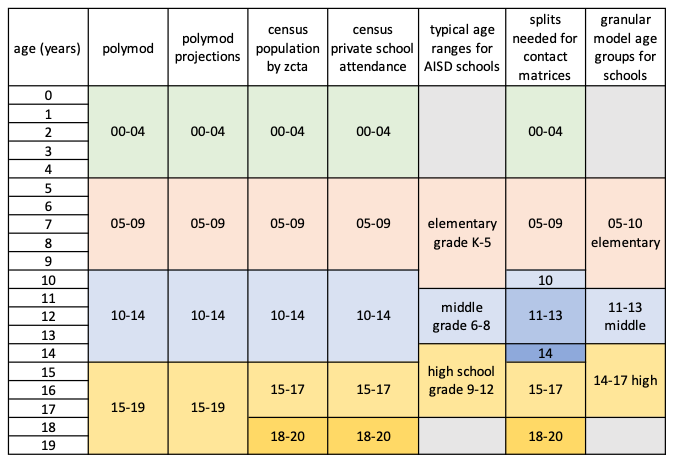

## Imports and helpers

In [1]:
import pandas as pd
import xarray as xr
from copy import deepcopy
from numpy.testing import assert_array_equal

In [2]:
def split_age_group(long_df, split_grp, newgrp1, newgrp2):
    
    # only works if the age columns are "age1" and "age2"
    assert 'age1' in long_df.columns
    assert 'age2' in long_df.columns

    # separate age groups
    split_grp_df = long_df[(long_df['age1'] == split_grp) | (long_df['age2'] == split_grp)]
    other_groups = long_df[(long_df['age1'] != split_grp) & (long_df['age2'] != split_grp)]
    
    # copy dataframes
    group_1 = deepcopy(split_grp_df)
    group_2 = deepcopy(split_grp_df)

    # reassign age group 1
    group_1['age1'] = [newgrp1 if i == split_grp else i for i in group_1['age1']]
    group_1['age2'] = [newgrp1 if i == split_grp else i for i in group_1['age2']]

    # reassign age group 2
    group_2['age1'] = [newgrp2 if i == split_grp else i for i in group_2['age1']]
    group_2['age2'] = [newgrp2 if i == split_grp else i for i in group_2['age2']]

    # add contacts between group 1 and group 2
    group_1_self = deepcopy(group_1[(group_1['age1'] == newgrp1) & (group_1['age2'] == newgrp1)])
    group_1_self['age2'] = newgrp2

    # add add contacts between group 2 and group 1
    group_2_self = deepcopy(group_2[(group_2['age1'] == newgrp2) & (group_2['age2'] == newgrp2)])
    group_2_self['age2'] = newgrp1
    
    # join everything
    regrouped = pd.concat([other_groups, group_1, group_2, group_1_self, group_2_self])
    
    # sanity checks
    age1_counts = regrouped['age1'].value_counts().unique()
    age2_counts = regrouped['age2'].value_counts().unique()
    assert len(age1_counts) == 1
    assert len(age2_counts) == 1
    assert_array_equal(age1_counts, age2_counts)
    
    return regrouped

## POLYMOD

Citation: Mossong J, Hens N, Jit M, Beutels P, Auranen K, Mikolajczyk R, et al. (2008) Social Contacts and Mixing Patterns Relevant to the Spread of Infectious Diseases. PLoS Med 5(3): e74. https://doi.org/10.1371/journal.pmed.0050074

Tables in `epimodels/notebooks/AustinGranularModel/BaselineContacts/Mosson2008PolymodSupplement.xlsx` are copied from Supporting Information Table S5, https://doi.org/10.1371/journal.pmed.0050074.st005 (this link downloads the tables in Microsoft Word `.doc` format).

Table represent "all contacts" (the Supporting Information also has data on "physical contacts" not copied). The row names indicate the "age of contact" and the column names indicate the "age of participant", where participants were the subjects who kept diaries as part of this study.

There is one sheet for each of the countries surveyed.

In [3]:
polymod = pd.read_excel('/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/Mosson2008PolymodSupplement.xlsx',
                       sheet_name=None, header=0)

In [4]:
polymod['BelgiumAll']

,Unnamed: 0,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70+
0,00-04,1.36,0.66,0.43,0.28,0.10,0.44,0.80,0.74,0.18,0.22,0.39,0.46,0.34,0.32,0.11
1,05-09,0.74,3.28,0.78,0.68,0.58,0.09,0.68,0.69,0.21,0.06,0.39,0.23,0.07,0.59,0.15
2,10-14,0.42,0.76,5.60,0.81,0.46,0.07,0.34,1.13,0.89,0.26,0.31,0.13,0.10,0.18,0.30
3,15-19,0.14,0.25,1.34,6.39,2.02,0.35,0.55,0.44,0.92,0.76,0.33,0.27,0.07,0.09,0.33
4,20-24,0.34,0.17,0.70,1.67,4.40,0.91,0.84,0.46,0.55,0.80,0.93,0.71,0.27,0.23,0.07
5,25-29,1.08,0.61,0.28,0.72,1.77,2.28,1.16,1.15,0.89,1.08,1.30,1.13,0.54,0.27,0.30
6,30-34,1.46,1.29,0.57,0.37,1.29,1.37,2.07,1.46,0.58,1.06,0.74,1.77,1.20,0.41,0.30
7,35-39,0.77,1.20,1.15,0.73,0.56,1.09,2.18,1.67,1.29,1.46,0.83,1.27,0.76,0.91,0.52
8,40-44,0.38,0.82,1.15,1.15,0.96,0.58,1.57,1.64,1.42,1.00,1.09,1.37,1.07,0.73,0.56
9,45-49,0.26,0.41,0.90,1.27,1.17,1.05,0.77,0.82,1.42,1.98,1.13,1.06,0.83,0.27,0.93


In [5]:
polymod_tables = []
for key, value in polymod.items():
    long = value.melt(id_vars='Unnamed: 0', var_name='age1', value_name='daily_per_capita_contacts')
    long = long.rename(columns={'Unnamed: 0': 'age2'})
    long['country'] = key
    polymod_tables.append(long)

In [6]:
polymod_long = pd.concat(polymod_tables)

In [7]:
polymod_long.head()

,age2,age1,daily_per_capita_contacts,country
0,00-04,00-04,1.36,BelgiumAll
1,05-09,00-04,0.74,BelgiumAll
2,10-14,00-04,0.42,BelgiumAll
3,15-19,00-04,0.14,BelgiumAll
4,20-24,00-04,0.34,BelgiumAll


In [8]:
polymod_long_regrouped = split_age_group(long_df=polymod_long, split_grp='15-19', newgrp1='15-17', newgrp2='18-19')


With the data groupings adjusted, we can convert the full dataset into an `xarray` and save as a `zarr` file.

In [9]:
polymod_long = polymod_long.set_index(['age1', 'age2', 'country'])
polymod_xr = polymod_long.to_xarray()
#polymod_xr.to_zarr('/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/polymod_mossong2008.zarr')

In [10]:
polymod_long_regrouped = polymod_long_regrouped.set_index(['age1', 'age2', 'country'])
polymod_long_regrouped_xr = polymod_long_regrouped.to_xarray()
#polymod_long_regrouped_xr.to_zarr('/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/polymod_mossong2008_regrouped.zarr')


We can also do some aggregations across dimensions of the `xarray` (demonstration only, not saved).

In [11]:
polymod_mean_xr = polymod_xr.mean(dim='country')

In [12]:
polymod_mean_xr

<xarray.Dataset>
Dimensions:                    (age1: 15, age2: 15)
Coordinates:
  * age1                       (age1) object '00-04' '05-09' ... '65-69' '70+'
  * age2                       (age2) object '00-04' '05-09' ... '65-69' '70+'
Data variables:
    daily_per_capita_contacts  (age1, age2) float64 2.375 1.198 ... 0.6613 1.45

## POLYMOD projections

Citation: Prem K, Cook AR, Jit M (2017) Projecting social contact matrices in 152 countries using contact surveys and demographic data. PLoS Comput Biol 13(9): e1005697. https://doi.org/10.1371/journal.pcbi.1005697

Prem et al. (2017) extend the POLYMOD study with statistical demographic models to estimate contact matrices for 152 countries (using the same age grouping.

Tables in `epimodels/notebooks/AustinGranularModel/BaselineContacts/contact_matrices_152_countries` are copied from Supporting Information S1 Dataset, https://doi.org/10.1371/journal.pcbi.1005697.s002 (this link downloads the directory `.zip` format). Files with the suffix `_1` contain sheets for countries "Albania" through "Morocco" and those with the suffix `_2` contain countries "Mozambique" through "Zimbabwe" (alphabetically, in English).

In [13]:
polymod_usa = polymod = pd.read_excel(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/contact_matrices_152_countries/MUestimates_all_locations_2.xlsx',
    sheet_name="United States of America", header=None)


/Users/kpierce/epimodels/epi-venv/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
polymod_usa

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2.598237,1.101286,0.499396,0.315998,0.411961,0.715457,1.057365,0.988814,0.497488,0.322391,0.336978,0.265980,0.173599,0.135957,0.073886,0.038853
1,0.989686,5.386372,1.224101,0.347044,0.193902,0.509275,0.892744,1.068942,0.846197,0.347779,0.241652,0.197511,0.170506,0.121280,0.051215,0.039004
2,0.304842,1.888934,8.284524,0.973481,0.347356,0.301111,0.537831,0.869836,1.047914,0.564866,0.319458,0.166290,0.104552,0.098895,0.063186,0.052481
3,0.173684,0.432369,3.067560,11.106139,1.599837,0.783971,0.636821,0.892186,1.125340,1.009137,0.533794,0.236870,0.095070,0.067864,0.033226,0.021371
4,0.262619,0.214390,0.329929,2.645996,4.257321,1.742612,1.146007,1.040654,0.915094,1.079188,0.738022,0.412893,0.121239,0.052891,0.049830,0.040059
5,0.579676,0.343560,0.209946,0.882349,2.024331,3.414656,1.729206,1.333241,1.128603,0.952613,0.905713,0.498146,0.162274,0.055466,0.026940,0.018639
6,0.685994,0.925715,0.705810,0.511232,0.993349,1.651464,2.724437,1.697023,1.316310,1.026176,0.798953,0.542883,0.215146,0.088143,0.040122,0.037413
7,0.673234,1.087263,0.907901,0.762107,0.712048,1.280754,1.572670,2.780799,1.831120,1.187005,0.862649,0.468816,0.253787,0.147221,0.074796,0.029849
8,0.344231,0.743115,1.012538,1.172505,0.867901,1.128282,1.445997,1.662298,2.523069,1.465606,1.041925,0.393184,0.213727,0.117480,0.074063,0.032296
9,0.369636,0.561619,0.752136,1.656516,0.894872,0.954490,1.148589,1.325174,1.421437,2.031986,1.079285,0.497942,0.183696,0.092167,0.074005,0.066027


The Prem et al. projections present 16 age groups (versus 15 in the POLYMOD study); figures in the manuscript indicate the last age group is discrete 75-79 years of age (versus an open-ended 75+ in the POLYMOD study). Though not explicitly stated, the structure of the figures corresponding to these data suggest that columns indicate the age group of the "participant" (in POLYMOD terms) and the rows indicate the age group of the "contact".

In [15]:
age_groups = [
    '00-04', '05-09', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
    '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79'
]
polymod_usa.columns = age_groups
polymod_usa['age2'] = age_groups

In [16]:
polymod_usa.head()

,00-04,05-09,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,age2
0,2.598237,1.101286,0.499396,0.315998,0.411961,0.715457,1.057365,0.988814,0.497488,0.322391,0.336978,0.265980,0.173599,0.135957,0.073886,0.038853,00-04
1,0.989686,5.386372,1.224101,0.347044,0.193902,0.509275,0.892744,1.068942,0.846197,0.347779,0.241652,0.197511,0.170506,0.121280,0.051215,0.039004,05-09
2,0.304842,1.888934,8.284524,0.973481,0.347356,0.301111,0.537831,0.869836,1.047914,0.564866,0.319458,0.166290,0.104552,0.098895,0.063186,0.052481,10-14
3,0.173684,0.432369,3.067560,11.106139,1.599837,0.783971,0.636821,0.892186,1.125340,1.009137,0.533794,0.236870,0.095070,0.067864,0.033226,0.021371,15-19
4,0.262619,0.214390,0.329929,2.645996,4.257321,1.742612,1.146007,1.040654,0.915094,1.079188,0.738022,0.412893,0.121239,0.052891,0.049830,0.040059,20-24


In [17]:
usa_long = polymod_usa.melt(id_vars='age2', var_name='age1', value_name='daily_per_capita_contacts')

In [18]:
usa_long.head()

,age2,age1,daily_per_capita_contacts
0,00-04,00-04,2.598237
1,05-09,00-04,0.989686
2,10-14,00-04,0.304842
3,15-19,00-04,0.173684
4,20-24,00-04,0.262619


The US Census Bureau age groups are slightly different for ages 15-24. US high school students are typically 18 years old or younger, so the polymod 15-19 year and 20-24 year baseline contacts need to be adjusted to match US Census Bureau ranges and school age range expectations.

We'll make the following new age groups:

- 0-4
- 5-10 (elementary school)
- 11-13 (middle school)
- 14-17 (high school)
- 18-49
- 50-64
- 65+

To accomplish this, we need to break apart some of the groups. Without more detailed contact rate information, we will assume that the contact rate for each sub-group within an age group is equal to the contact rate for the entire age group (e.g., contacts for 15-19 year olds are equal to contacts for 15-17 year olds and 18-19 year olds).

In [19]:
usa_regrouped_1 = split_age_group(long_df=usa_long, split_grp='15-19', newgrp1='15-17', newgrp2='18-19')
usa_regrouped_2 = split_age_group(long_df=usa_regrouped_1, split_grp='10-14', newgrp1='10', newgrp2='11-14')
usa_regrouped_3 = split_age_group(long_df=usa_regrouped_2, split_grp='11-14', newgrp1='11-13', newgrp2='14')


In [20]:
usa_regrouped_3.tail()

,age2,age1,daily_per_capita_contacts
50,14,18-19,0.973481
34,14,10,8.284524
34,10,14,8.284524
34,14,11-13,8.284524
34,11-13,14,8.284524


In [21]:
usa_regrouped_3['age1'].value_counts()

00-04    19
60-64    19
11-13    19
10       19
18-19    19
15-17    19
75-79    19
70-74    19
65-69    19
55-59    19
05-09    19
50-54    19
45-49    19
40-44    19
35-39    19
30-34    19
25-29    19
20-24    19
14       19
Name: age1, dtype: int64

In [22]:
usa_regrouped_3['age2'].value_counts()

00-04    19
60-64    19
11-13    19
10       19
18-19    19
15-17    19
75-79    19
70-74    19
65-69    19
55-59    19
05-09    19
50-54    19
45-49    19
40-44    19
35-39    19
30-34    19
25-29    19
20-24    19
14       19
Name: age2, dtype: int64

To re-aggregate, take the population-weighted average of the daily per-capita contacts. A single person in age group *i* will have $\Sigma$(x$_{j}$ $*$ N$_{j}$)/$\Sigma$(N$_{j}$) contacts for all age sub-groups *j*, where x$_{j}$ is the daily per capita contact rate for age sub-group *j* and N$_{j}$ is the population size of age sub-group *j*.

US total population data from National Population by Characteristics: 2010-2019; table download link https://www2.census.gov/programs-surveys/popest/tables/2010-2019/national/asrh/nc-est2019-agesex.xlsx

Citation: US Census Bureau, “National Population by Characteristics: 2010-2019,” Census.gov. https://www.census.gov/data/tables/time-series/demo/popest/2010s-national-detail.html (accessed Mar. 15, 2022).

Since we'll be building a parameterization for 2018-2019, we'll take the average population weights for those two years and use that average for the contact matrix reweighting.

In [23]:
us_pop_total = pd.read_excel(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/nc-est2019-syasexn.xlsx',
    skiprows=[0, 1, 2], nrows=1
)
us_pop_total = us_pop_total.rename(columns={'Unnamed: 0': 'age'})

In [24]:
us_pop_total

,age,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Total\nPopulation,308745538,308758105,309321666,311556874,313830990,315993715,318301008,320635163,322941311,324985539,326687501,328239523


In [25]:
us_total_pop_2018 = us_pop_total[2018].values.item()
us_total_pop_2019 = us_pop_total[2019].values.item()
us_total_pop_avg = (us_total_pop_2018 + us_total_pop_2019) / 2

In [26]:
us_pop_age = pd.read_excel(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/nc-est2019-syasexn.xlsx',
    skiprows=[0, 1, 2, 4], nrows=101
)
us_pop_age = us_pop_age.rename(columns={'Unnamed: 0': 'age'})

In [27]:
us_pop_age['age'] = [i.split('.')[1] for i in us_pop_age['age']]
us_pop_age['age'] = [i.split('+')[0] for i in us_pop_age['age']]

In [28]:
us_pop_age['age'] = us_pop_age['age'].astype(int)

In [29]:
us_pop_age.tail()

,age,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
96,96,95223,95288,97259,101295,105060,108285,120427,122315,136011,147449,151823,157463
97,97,68138,68168,68966,73267,76840,79369,82948,92078,94732,104068,113716,116969
98,98,45900,45938,47086,50654,54192,56508,59546,61585,69464,71571,77943,86150
99,99,32266,32289,32214,33604,36514,38797,41277,43276,45030,50969,53184,57124
100,100,53364,53412,54437,57513,61035,64898,70685,75449,81199,85663,93038,100322


In [30]:
us_pop_age['avg_2018_2019'] = (us_pop_age[2018] + us_pop_age[2019]) / 2

The following works only because the dataframe is sorted in ascending order:

In [31]:
age_groups = []
for i in us_pop_age['age']:
    if i < 5:
        age_groups.append('00-04')
    elif i < 11:
        age_groups.append('05-10')
    elif i < 14:
        age_groups.append('11-13')
    elif i < 18:
        age_groups.append('14-17')
    elif i < 50:
        age_groups.append('18-49')
    elif i < 65:
        age_groups.append('50-64')
    else:
        age_groups.append('65+')
us_pop_age['age_group'] = age_groups

Add some more percentage columns and save this file for use elsewhere:

In [32]:
us_pop_age['pct_of_total_2018'] = us_pop_age[2018] / us_total_pop_2018
us_pop_age['pct_of_total_2019'] = us_pop_age[2019] / us_total_pop_2019

In [33]:
us_pop_age_for_zcta_integration = us_pop_age[['age', 2018, 2019, 'age_group', 'pct_of_total_2018', 'pct_of_total_2019']]
us_pop_age_for_zcta_integration.to_csv('/Users/kpierce/epimodels/notebooks/AustinGranularModel/DataIntegration/us_pop_age_for_zcta_integration_2018_2019.csv')


In [34]:
us_pop_age_grouped = us_pop_age.groupby('age_group')['avg_2018_2019'].sum().reset_index()

In [35]:
us_pop_age_grouped

,age_group,avg_2018_2019
0,00-04,19669822.5
1,05-10,24313361.5
2,11-13,12547643.5
3,14-17,16648320.0
4,18-49,138066004.5
5,50-64,63004559.0
6,65+,53213801.0


In [36]:
us_pop_age_grouped['age_group_percent_of_total'] = us_pop_age_grouped['avg_2018_2019'] / us_total_pop_avg

In [37]:
us_pop_age_grouped

,age_group,avg_2018_2019,age_group_percent_of_total
0,00-04,19669822.5,0.060067
1,05-10,24313361.5,0.074248
2,11-13,12547643.5,0.038318
3,14-17,16648320.0,0.050840
4,18-49,138066004.5,0.421623
5,50-64,63004559.0,0.192402
6,65+,53213801.0,0.162503


In [38]:
print(us_pop_age_grouped['age_group_percent_of_total'].sum())

1.0


Now we can take the population weighted average of the POLYMOD projections for the USA.

In [39]:
revised_groups = {
    '00-04': '00-04',
    '05-09': '05-10',
    '10': '05-10',
    '11-13': '11-13',
    '14': '14-17',
    '15-17': '14-17',
    '18-19': '18-49',
    '20-24': '18-49',
    '25-29': '18-49',
    '30-34': '18-49',
    '35-39': '18-49',
    '40-44': '18-49',
    '45-49': '18-49',
    '50-54': '50-64',
    '55-59': '50-64',
    '60-64': '50-64',
    '65-69': '65+',
    '70-74': '65+',
    '75-79': '65+'
}

In [40]:
usa_regrouped_3['age1_group'] = [revised_groups[i] for i in usa_regrouped_3['age1']]
usa_regrouped_3['age2_group'] = [revised_groups[i] for i in usa_regrouped_3['age2']]

In [41]:
usa_regrouped_3.head()

,age2,age1,daily_per_capita_contacts,age1_group,age2_group
0,00-04,00-04,2.598237,00-04,00-04
1,05-09,00-04,0.989686,00-04,05-10
4,20-24,00-04,0.262619,00-04,18-49
5,25-29,00-04,0.579676,00-04,18-49
6,30-34,00-04,0.685994,00-04,18-49


In [42]:
usa_regrouped_weighted = pd.merge(
    usa_regrouped_3, us_pop_age_grouped, left_on='age2_group', right_on='age_group', how='left'
)

In [43]:
usa_regrouped_weighted['numerator'] = usa_regrouped_weighted['daily_per_capita_contacts'] * usa_regrouped_weighted['age_group_percent_of_total']


In [44]:
usa_weighted = usa_regrouped_weighted.groupby(
    ['age1_group', 'age2_group']
).sum(
    ['numerator', 'age_group_percent_of_total']
).reset_index()

In [45]:
usa_weighted['weighted_daily_per_capita_contacts'] = usa_weighted['numerator'] / usa_weighted['age_group_percent_of_total']

In [46]:
usa_weighted.head(20)

,age1_group,age2_group,daily_per_capita_contacts,avg_2018_2019,age_group_percent_of_total,numerator,weighted_daily_per_capita_contacts
0,00-04,00-04,2.598237,1.966982e+07,0.060067,0.156069,2.598237
1,00-04,05-10,1.294528,4.862672e+07,0.148495,0.096116,0.647264
2,00-04,11-13,0.304842,1.254764e+07,0.038318,0.011681,0.304842
3,00-04,14-17,0.478526,3.329664e+07,0.101680,0.024328,0.239263
4,00-04,18-49,3.089074,9.664620e+08,2.951358,1.302423,0.441296
5,00-04,50-64,1.291459,1.890137e+08,0.577205,0.248479,0.430486
6,00-04,65+,0.591866,1.596414e+08,0.487509,0.096180,0.197289
7,05-10,00-04,1.600682,3.933964e+07,0.120134,0.096149,0.800341
8,05-10,05-10,16.783931,9.725345e+07,0.296990,1.246166,4.195983
9,05-10,11-13,10.173458,2.509529e+07,0.076635,0.389823,5.086729


In [47]:
usa_weighted = usa_weighted.rename(
    columns={
        'age1_group': 'age0',
        'age2_group': 'age1',
        'daily_per_capita_contacts': 'daily_per_capita_contacts_unweighted'
    }
)
usa_weighted = usa_weighted.rename(
    columns={
        'weighted_daily_per_capita_contacts': 'daily_per_capita_contacts'
    }
)

In [48]:
usa_weighted_xr = usa_weighted[['age0', 'age1', 'daily_per_capita_contacts']].set_index(['age0', 'age1']).to_xarray()


In [49]:
usa_weighted_da = usa_weighted_xr['daily_per_capita_contacts']

In [50]:
usa_weighted_da

<xarray.DataArray 'daily_per_capita_contacts' (age0: 7, age1: 7)>
array([[2.59823747, 0.64726388, 0.30484184, 0.23926277, 0.4412963 ,
        0.43048628, 0.19728874],
       [0.80034088, 4.19598263, 5.08672893, 3.41834656, 0.80670355,
        0.66398687, 0.35651229],
       [0.49939612, 4.75431221, 8.28452356, 5.67604157, 0.99797423,
        0.7118537 , 0.36676467],
       [0.40769692, 2.70728727, 4.62900218, 5.85792574, 1.8373331 ,
        0.84528326, 0.33658356],
       [0.61563909, 0.6320198 , 0.66319918, 1.55684464, 1.65694933,
        0.98870753, 0.33340093],
       [0.25885223, 0.19999489, 0.19676672, 0.24267226, 0.48838158,
        0.98128953, 0.34769072],
       [0.08289874, 0.07101031, 0.07152093, 0.05617059, 0.05904117,
        0.14349755, 0.38680483]])
Coordinates:
  * age0     (age0) object '00-04' '05-10' '11-13' '14-17' '18-49' '50-64' '65+'
  * age1     (age1) object '00-04' '05-10' '11-13' '14-17' '18-49' '50-64' '65+'

In [55]:
usa_weighted_da.to_netcdf(
    '/Users/kpierce/epimodels/notebooks/AustinGranularModel/BaselineContacts/usa_baseline_contacts_seven_age_groups_avg2018_2019.nc',
    engine='netcdf4'
)
